# Section 1- Dataset introduction
This dataset is called default of credit card clients found at UCI which can be accessed using the following link-
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

It contains default payments of customers in Taiwan.
It has 30,000 instances and 24 attributes along with a target Y which has 0 or 1 values stating the default payment due next month (if yes, it is 1 otherwise 0).
The attributes characteristic are Integer, Real. 


Attribute information is as follows-


default value (Yes=1, No=0) is the response or target variable. 

All other 23 variables are-
X1: Amount of the given credit
X2: Gender (1 = male; 2 = female)
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
X4: Marital status (1 = married; 2 = single; 3 = others)
X5: Age (year)
X6 - X11: History of past payment. 
  X6 = the repayment status in September, 2005 
  X7 = the repayment status in August, 2005 . . .X11= the repayment status in April, 2005. 
  
    The measurement scale for the repayment status is: 
    -1 = pay duly
    1 = payment delay for one month 
    2 = payment delay for two months; . . .; 8 = payment delay for eight months
    9 = payment delay for nine months and above


X12-X17: Amount of bill statement
    X12 = amount of bill statement in September, 2005
    X13 = amount of bill statement in August, 2005; . . . X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment 
    X18 = amount paid in September, 2005
    X19 = amount paid in August, 2005 . . .X23 = amount paid in April, 2005. 





# Section 2- Loading the dataset
In this section , I am loading the dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import pickle
import graphviz 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

ST_data=pd.read_csv('/Users/shomronjacob/Desktop/default of credit card clients.csv')
print("The shape of the data set is (No of instances, No of atttributes) = ",ST_data.shape )
# print(ST_data.shape)
print('')
print('')
print(ST_data.head(4))
feature_names=["ID","LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_1","PAY_2","PAY_3","PAY_4","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","deafault payment next month"]
target_names=["No","Yes"]
leg_fn=len(feature_names)
print(leg_fn)
dataset=pd.DataFrame(ST_data,columns=feature_names)

The shape of the data set is (No of instances, No of atttributes) =  (30000, 25)


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689         0         0         0         0   
1      1000      1000      100

# Section 3- Spliting the dataset

This section deals with spliting of the dataset into test and train using the train_test_split from sklearn.
The ration taken is 2/3 for train and 1/3 for test.

In [2]:
X=ST_data.iloc[:,0:24]
Y=ST_data.iloc[:,24]
print(X.head(5))
print('')
print('')
print(Y)
print(X.shape)
print(Y.shape)

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

     ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0    ...           689          0          0          0         0       689   
1    ...          2682       3272       3455       3261         0      1000   
2    ...         13559      14331      14948      15549      1518      1500   
3    ...         49291      28314      28959      29547      2000      2019   
4    ...         35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0     

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.333, random_state=42, shuffle=False)
print(X_train.head(4))
print('')
print('')
print('')
print(y_train.head(4))

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   

     ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0    ...           689          0          0          0         0       689   
1    ...          2682       3272       3455       3261         0      1000   
2    ...         13559      14331      14948      15549      1518      1500   
3    ...         49291      28314      28959      29547      2000      2019   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         0         0         0         0  
1      1000      1000         0      2000  
2      1000      1000      1000      5000  
3      1200      1100      1069 

# Section 4- Model fitting 
Here, I am fitting the model using Logistic regression. This section has several parts which are divided into sub headings with explanations for each.

#            # 4.1- L2-regularized model 
Here, I train the L2 regularized logistic regression on the train split using default paramenters for all except penalty which is set to L2.
After the model is fit, I am printing the top 10 features having highest absolute values of their weights. 

In [94]:
model=LogisticRegression(penalty='l2')
model2_lr=model.fit(X_train,y_train)
print(model2_lr)
# predict class labels for test set
print("The score of the model is", model2_lr.score(X,Y)*100)
print("Predicted score is-",model2_lr.predict(X_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
The score of the model is 77.8733333333
Predicted score is- [0 0 0 ..., 0 0 0]


In [96]:
# printing weights of the features
print("Weight values of the features are: \n",model2_lr.coef_)

Weight values of the features are: 
 [[ -3.40853741e-05  -3.62339701e-06  -7.68244258e-05  -9.25598163e-05
   -8.85366171e-05  -1.21810076e-03   2.19698169e-04   1.71294370e-04
    1.53060659e-04   1.38204597e-04   1.30368087e-04   1.16918699e-04
   -1.21737566e-05   7.19495423e-06   9.27261392e-07   2.39841111e-06
    4.59939806e-06   1.33663565e-06  -3.98586998e-05  -1.66657324e-05
   -9.33034489e-06  -1.08053968e-05  -2.32712701e-06  -2.11777689e-06]]


In [6]:
# save the above calculated coef(weight) values and the get the absolute values
weights=model2_lr.coef_[0]
weights_absolute=np.abs(weights)
print(weights_absolute)
print(len(weights_absolute))
# sorting absolute weights to get top 10 features
sortted_weights=np.argsort(weights_absolute)[::-1][:10]
sortted_weights

[  1.80437278e-05   2.77603963e-06   2.58043024e-03   2.40567336e-03
   3.32240605e-03   1.04421884e-02   1.25634225e-02   9.68672105e-03
   8.61463608e-03   7.60405570e-03   7.15541785e-03   6.36271739e-03
   1.09025598e-05   6.71538389e-06   1.02376787e-06   1.29876265e-06
   4.67044181e-06   1.13811466e-06   3.57969815e-05   1.51150767e-05
   8.37727458e-06   1.02678520e-05   2.05226525e-06   2.36324481e-06]
24


array([ 6,  5,  7,  8,  9, 10, 11,  4,  2,  3])

# 4.1.1- Top 10 features
Here, the top 10 features along with the weights (absolute values) are printed.

In [7]:
print("Top 10 features (after L2 regularization) along with their weights are-")
print('')
for i in sortted_weights:
    print(feature_names[i] , weights_absolute[i] )

Top 10 features (after L2 regularization) along with their weights are-

PAY_0 0.012563422511
AGE 0.0104421884498
PAY_1 0.00968672105435
PAY_2 0.00861463607824
PAY_3 0.00760405570222
PAY_4 0.00715541785189
BILL_AMT1 0.00636271738548
MARRIAGE 0.00332240605121
SEX 0.00258043023871
EDUCATION 0.00240567335777


# 4.2- L1 regularization
here, I train the model using L1 regularization with penalty as L1. Same as above, the top 10 features are also shown along with their absolute weights.

In [109]:
model1=LogisticRegression(penalty='l1')
model1_lr=model1.fit(X_train,y_train)
print(model1_lr)
print('')
print("The score of the model is", model1_lr.score(X,Y)*100)
print("Predicted score is-",model1_lr.predict(X_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The score of the model is 81.0266666667
Predicted score is- [0 0 0 ..., 1 0 0]


In [98]:
# printing weights of the features
print("Weight values of the features are: \n",model1_lr.coef_)

Weight values of the features are: 
 [[  2.16225733e-07  -5.65469467e-07  -9.27901561e-02  -1.09588837e-01
   -1.63739121e-01   4.48776279e-03   5.70106799e-01   6.82712031e-02
    8.37148941e-02  -1.09115117e-02   8.24060192e-02  -7.40228419e-03
   -7.01283557e-06   3.63955364e-06   2.42895781e-07  -5.83037919e-07
    2.22214697e-06   3.88902915e-07  -1.73937597e-05  -6.50418557e-06
   -3.69610091e-06  -4.96801504e-06  -8.60934591e-07  -2.31113433e-06]]


In [10]:
# save the above calculated coef(weight) values and the get the absolute values
weights_L1=model1_lr.coef_[0]
weights_absolute_L1=np.abs(weights_L1)
print(weights_absolute_L1)
print(len(weights_absolute_L1))
# sorting absolute weights to get top 10 features
sortted_weights_L1=np.argsort(weights_absolute_L1)[::-1][:10]
sortted_weights_L1

[  2.37722742e-07   5.64491657e-07   9.23206756e-02   1.09370253e-01
   1.62918145e-01   4.53585272e-03   5.70113679e-01   6.82825936e-02
   8.37574226e-02   1.08722478e-02   8.24218825e-02   7.46707935e-03
   6.99320618e-06   3.60145682e-06   2.82921466e-07   6.56528205e-07
   2.31533463e-06   3.47592146e-07   1.73675273e-05   6.52807206e-06
   3.67167648e-06   5.02201716e-06   8.25846348e-07   2.31801479e-06]
24


array([ 6,  4,  3,  2,  8, 10,  7,  9, 11,  5])

# 4.2.1- Top 10 features

In [11]:
print("Top 10 features (after L1 regularization) along with their weights are-")
print('')
for j in sortted_weights_L1:
    print(feature_names[j] , weights_absolute_L1[j] )

Top 10 features (after L1 regularization) along with their weights are-

PAY_0 0.570113678845
MARRIAGE 0.162918144984
EDUCATION 0.109370253373
SEX 0.0923206755864
PAY_2 0.0837574226444
PAY_4 0.0824218824757
PAY_1 0.0682825936383
PAY_3 0.0108722477881
BILL_AMT1 0.00746707935113
AGE 0.00453585271719


# 4.3 Decision tree classifier
This section trains the DecisionTreeClassifier on the train split using max_depth=6 and min_impurity_decrease=0.005

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.005, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


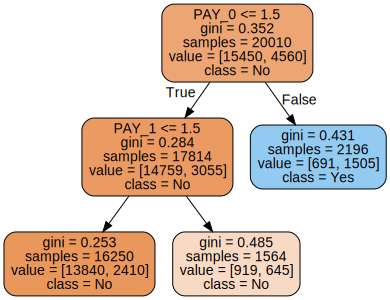

In [99]:
clf=tree.DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.005)
clf=clf.fit(X_train,y_train)
print(clf)
dot_data=tree.export_graphviz(clf,feature_names=feature_names,class_names=target_names,filled=True,rounded=True,out_file=None)
graph=graphviz.Source(dot_data)
graph

# 4.4- Discussion of results?
If you look at the top 10 feature results of L1 and L2 and compare that with DT, you will notice that L2 and Dt show some features that are common between the two, however there is no feature from L1 that comes up in DT, hence L2 and DT provide more details and work close to each other while L1 does not.

# 4.5- Z-scoring all features using StandardScaler
This deals with z-scoring all features using StandardScaler. Both test and train are also z-scored using the same. then I use fit_transform on train and transform.fit on test.


In [101]:
# creating a scalar object
sc=StandardScaler()

#Fitting the scalar to the training data and transfrom
X_train_std=sc.fit_transform(X_train)

X_test_std=sc.transform(X_test)
print("The scaled train data is: \n",X_train_std)
print('')
print('')
print("Scaled test data is: \n",X_test_std)

The scaled train data is: 
 [[-1.73196425 -1.11327836  0.79247745 ..., -0.3113011  -0.30806408
  -0.29353309]
 [-1.73179113 -0.33658165  0.79247745 ..., -0.24540989 -0.30806408
  -0.17794172]
 [-1.73161801 -0.56959066  0.79247745 ..., -0.24540989 -0.24331108
  -0.00455468]
 ..., 
 [ 1.73161801  0.12943638  0.79247745 ..., -0.27321598 -0.27970226
  -0.27735029]
 [ 1.73179113  0.28477572  0.79247745 ..., -0.11362747 -0.09871762
  -0.12014604]
 [ 1.73196425  0.51778474  0.79247745 ..., -0.22933244 -0.30806408
  -0.24677638]]


Scaled test data is: 
 [[ 1.73213737  0.36244539  0.79247745 ..., -0.08068187  0.00799532
  -0.08090277]
 [ 1.73231049  0.05176671  0.79247745 ...,  0.09241434  0.11606808
   0.05902058]
 [ 1.73248361  0.28477572  0.79247745 ...,  1.22785167  1.35692985
   0.27771944]
 ..., 
 [ 3.46107205 -1.03560869 -1.26186556 ..., -0.03455802 -0.17855807
  -0.11436647]
 [ 3.46124516 -0.64726033 -1.26186556 ..., -0.18439463  3.12151389
  -0.18926968]
 [ 3.46141828 -0.88026935 -1.2

In [102]:
# creating the pickle file for my data
A = {}
A['X_train'] = X_train_std
A['y_train'] = y_train
A['X_test'] = X_test_std
A['y_test'] = y_test
A['target_names'] = target_names
A['feature_names'] = feature_names
pickle.dump(A, open("sjacob9.pickle", "wb"))
print(A['X_train'])

[[-1.73196425 -1.11327836  0.79247745 ..., -0.3113011  -0.30806408
  -0.29353309]
 [-1.73179113 -0.33658165  0.79247745 ..., -0.24540989 -0.30806408
  -0.17794172]
 [-1.73161801 -0.56959066  0.79247745 ..., -0.24540989 -0.24331108
  -0.00455468]
 ..., 
 [ 1.73161801  0.12943638  0.79247745 ..., -0.27321598 -0.27970226
  -0.27735029]
 [ 1.73179113  0.28477572  0.79247745 ..., -0.11362747 -0.09871762
  -0.12014604]
 [ 1.73196425  0.51778474  0.79247745 ..., -0.22933244 -0.30806408
  -0.24677638]]


# 4.5.1- Repeating 4.1 to 4.3 on above z-scored data

# L2 regularisation using penalty as l2 (z-scored data)

In [108]:
model_stdL2=LogisticRegression(penalty='l2')
model2_lr_std=model_stdL2.fit(X_train_std,y_train)
print(model2_lr_std)
print('')
# predict class labels for test set
print("The score of the model is", model2_lr_std.score(X,Y)*100)
print("Predicted score is-",model_stdL2.predict(X_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The score of the model is 77.77
Predicted score is- [0 0 0 ..., 0 0 0]


In [103]:
#feature weights are
print("Weight values of the features are: \n",model2_lr_std.coef_)

Weight values of the features are: 
 [[ 0.00195904 -0.07227527 -0.04432946 -0.08388282 -0.08398006  0.04341904
   0.6394942   0.08243452  0.10250346 -0.01472419  0.09630477 -0.01002737
  -0.49470989  0.24581852  0.01668352 -0.03702786  0.13303432  0.02246292
  -0.2631305  -0.13951047 -0.05872348 -0.07536339 -0.01333948 -0.04003837]]


In [104]:
# save the above calculated coef(weight) values and the get the absolute values
weights_std_L2=model2_lr_std.coef_[0]
weights_absolute_std_L2=np.abs(weights_std_L2)
print(weights_absolute_std_L2)
print(len(weights_absolute_std_L2))
# sorting absolute weights to get top 10 features
sortted_weights_std_L2=np.argsort(weights_absolute_std_L2)[::-1][:10]
sortted_weights_std_L2

[ 0.00195904  0.07227527  0.04432946  0.08388282  0.08398006  0.04341904
  0.6394942   0.08243452  0.10250346  0.01472419  0.09630477  0.01002737
  0.49470989  0.24581852  0.01668352  0.03702786  0.13303432  0.02246292
  0.2631305   0.13951047  0.05872348  0.07536339  0.01333948  0.04003837]
24


array([ 6, 12, 18, 13, 19, 16,  8, 10,  4,  3])

# Top 10 features



In [105]:
print("Top 10 features on z-scored data (after L2 regularization) along with their weights are-")
print('')
for k in sortted_weights_std_L2:
    print(feature_names[k] , weights_absolute_std_L2[k] )

Top 10 features on z-scored data (after L2 regularization) along with their weights are-

PAY_0 0.639494203853
BILL_AMT2 0.494709892941
PAY_AMT2 0.263130498762
BILL_AMT3 0.245818515394
PAY_AMT3 0.139510466035
BILL_AMT6 0.133034323329
PAY_2 0.102503463155
PAY_4 0.0963047674867
MARRIAGE 0.0839800584923
EDUCATION 0.0838828192747


# L1 regularisation using penalty l1 (z-scored data)

In [107]:
model1_stdL1=LogisticRegression(penalty='l1')
model1_lr_std_L1=model1_stdL1.fit(X_train_std,y_train)
print(model1_lr_std_L1)
print('')
print("The score of the model is", model1_lr_std_L1.score(X,Y)*100)
print("Predicted score is-",model1_lr_std_L1.predict(X_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The score of the model is 77.82
Predicted score is- [0 0 0 ..., 0 0 0]


In [20]:
# Feature weights are
print(model1_lr_std_L1.coef_)

[[ 0.00131391 -0.07214678 -0.04403678 -0.0833661  -0.08367381  0.04316827
   0.63984263  0.08208739  0.10167319 -0.01251092  0.09366534 -0.00802268
  -0.47998978  0.23298278  0.0046129  -0.0128101   0.12042772  0.01993581
  -0.25977888 -0.13832346 -0.06094201 -0.07220359 -0.01277716 -0.03988877]]


In [21]:
# save the above calculated coef(weight) values and the get the absolute values
weights_L1_std=model1_lr_std_L1.coef_[0]
weights_absolute_std_L1=np.abs(weights_L1_std)
print(weights_absolute_std_L1)
print(len(weights_absolute_std_L1))
# sorting absolute weights to get top 10 features
sortted_weights_std_L1=np.argsort(weights_absolute_std_L1)[::-1][:10]
sortted_weights_std_L1

[ 0.00131391  0.07214678  0.04403678  0.0833661   0.08367381  0.04316827
  0.63984263  0.08208739  0.10167319  0.01251092  0.09366534  0.00802268
  0.47998978  0.23298278  0.0046129   0.0128101   0.12042772  0.01993581
  0.25977888  0.13832346  0.06094201  0.07220359  0.01277716  0.03988877]
24


array([ 6, 12, 18, 13, 19, 16,  8, 10,  4,  3])

# Top 10 features

In [22]:
print("Top 10 features on z-scored data (after L1 regularization) along with their weights are-")
print('')
for m in sortted_weights_std_L1:
    print(feature_names[m] , weights_absolute_std_L1[m])

Top 10 features on z-scored data (after L1 regularization) along with their weights are-

PAY_0 0.639842629203
BILL_AMT2 0.479989778473
PAY_AMT2 0.259778878986
BILL_AMT3 0.232982780018
PAY_AMT3 0.138323458952
BILL_AMT6 0.120427718762
PAY_2 0.101673192088
PAY_4 0.0936653426071
MARRIAGE 0.0836738093597
EDUCATION 0.0833661006358


# Decisiontreeclassifier (z-scored data)
max_depth=6 and min_impurity_decrease=0.005

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.005, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


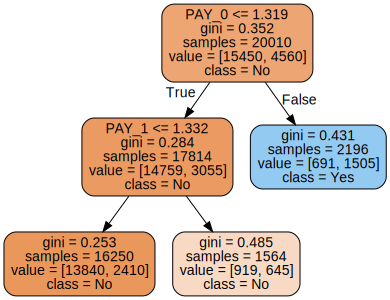

In [23]:
clf_std=tree.DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.005)
clf_std=clf_std.fit(X_train_std,y_train)
print(clf_std)
dot_data_std=tree.export_graphviz(clf_std,feature_names=feature_names,class_names=target_names,filled=True,out_file=None,rounded=True)
graph_L1_std=graphviz.Source(dot_data_std)
graph_L1_std

# Results
The same process is repeated on z-scored data.In section 4.4,  the top features of L2 and DT matches, but here, after we apply L2, L1 and Dt on the z-scored data, all three of them have the top features which is different from what we observed on section 4.4.
Also, the DT matches with same features and same depth as in section 4.4
Also, the accuracy of L1 on normal data was 81% which fell to 77% for L1 on z-scored data.

# Section 5- Evidence on z-scored data
In this section, we deal with calculating evidence for the different types of objects-

In [110]:
# probability distribution 
probDist=model2_lr_std.predict_proba(X_test)
print("Probability distribution is-", probDist)
# using predicted probability for L2 on test
predProb=model2_lr_std.predict(X_test_std)
print('')
print("Predicted probabilty is-",predProb)
intercept_weight=model2_lr_std.intercept_[0]
print("The bias weight is-",intercept_weight)
print('')
pridprob=model2_lr_std.predict_proba(X_test_std)
print(pridprob)

Probability distribution is- [[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]

Predicted probabilty is- [0 0 0 ..., 1 0 0]
The bias weight is- -1.41009211603

[[ 0.83453188  0.16546812]
 [ 0.66416518  0.33583482]
 [ 0.92332598  0.07667402]
 ..., 
 [ 0.17808544  0.82191456]
 [ 0.85203616  0.14796384]
 [ 0.73405019  0.26594981]]


/Users/shomronjacob/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


# Evidence (Positive or Negative)
In this section, I am calculating evidence. Based on it being greater than or less than 0 , it is categorised as positive or negative.


In [111]:
# For LR, given D(i), feature X(j) LR calculated as-
# LR= W(j)*X(j) over d(i) , here W(j) is for feature value

wj_xj=np.multiply(X_test_std,model2_lr_std.coef_[0])

evidence_greaterThan0_positive=[] #postive evidence list
evidence_lessThan0_negative=[] #negative evidence list
LenGTH=X_test_std.shape[0]
for j in range(LenGTH):
    evidence_greaterThan0_positive.append(np.add(model2_lr_std.intercept_[0],np.sum(k for k in wj_xj[j] if k>0))) # for +ve evidence
    evidence_lessThan0_negative.append(np.add(model2_lr_std.intercept_[0],np.sum(k for k in wj_xj[j] if k<0)))    # for -ve evidence        

In [114]:
# function to get the final results-
def Final(ith):
    print(" Total positive evidence is:",evidence_greaterThan0_positive[ith])
    print('')
    print(" Total negative evidence is:",evidence_lessThan0_negative[ith])
    print('')
    print("probability distribution is:", probDist[ith])
    print('')
    print("Object number",ith,"is the most positive object")
    evidence=[(j,model2_lr_std.coef_[0][j]*X_test_std[ith][j]) for j in range(leg_fn)]
    last3features=sorted(evidence,key=lambda x:x[1])
    first3features=sorted(evidence,key=lambda x:-x[1])
    print('')
    print('')
    print("Top 3 features for positive log evidence are-")
    L_features=len(feature_names)
#     print(L_features)
    for j in range(1):
        CalE=np.multiply(model2_lr_std.coef_[0][j],X_test_std[ith][j])
        for k,CalE in first3features[:3]:
            print("The feature is-",feature_names[k],"having weight_bais_value =",X_test_std[ith][k],"and evidence value of",CalE)
        print('')
        for k,CalE in last3features[:3]:
            print("The feature is-",feature_names[k],"having weight_bais_value =" ,X_test_std[ith][k],"and evidence value of",CalE)
        print('')

# 5.1- The most positive object with respect to the probabilities

In [115]:
ith=np.argmax(probDist[:,1])
Final(ith)

 Total positive evidence is: 0.351328650118

 Total negative evidence is: -7.44389639915

probability distribution is: [ 0.  1.]

Object number 179 is the most positive object


Top 3 features for positive log evidence are-
The feature is- BILL_AMT3 having weight_bais_value = 2.85574846727 and evidence value of 0.701996066473
The feature is- BILL_AMT6 having weight_bais_value = 3.71755830976 and evidence value of 0.494562522405
The feature is- BILL_AMT2 having weight_bais_value = -0.729231522493 and evidence value of 0.360758230713

The feature is- PAY_AMT2 having weight_bais_value = 16.6898901411 and evidence value of -4.39161892492
The feature is- PAY_0 having weight_bais_value = -1.8023713132 and evidence value of -1.15260602701
The feature is- BILL_AMT5 having weight_bais_value = 3.45178764043 and evidence value of -0.127812065419



# 5.2- The most negative object with respect to the probabilities

In [116]:
ith=np.argmax(probDist[:,0])
Final(ith)

 Total positive evidence is: -0.169797177801

 Total negative evidence is: -2.85838732942

probability distribution is: [ 1.  0.]

Object number 0 is the most positive object


Top 3 features for positive log evidence are-
The feature is- BILL_AMT3 having weight_bais_value = 2.39588710702 and evidence value of 0.588953594518
The feature is- BILL_AMT6 having weight_bais_value = 1.75998240593 and evidence value of 0.234137911376
The feature is- PAY_2 having weight_bais_value = 1.76503211104 and evidence value of 0.180921894111

The feature is- BILL_AMT2 having weight_bais_value = 2.11537157791 and evidence value of -1.04649577563
The feature is- PAY_AMT2 having weight_bais_value = 0.790898012297 and evidence value of -0.208109379338
The feature is- BILL_AMT5 having weight_bais_value = 2.22162329143 and evidence value of -0.0822617991134



# Object with largest positive evidence

In [117]:
ith=np.argmax(evidence_greaterThan0_positive)
Final(ith)

 Total positive evidence is: 7.45532105476

 Total negative evidence is: -5.02774034061

probability distribution is: [ 1.  0.]

Object number 5859 is the most positive object


Top 3 features for positive log evidence are-
The feature is- PAY_0 having weight_bais_value = 7.11544926369 and evidence value of 4.55028863706
The feature is- BILL_AMT3 having weight_bais_value = 6.0744755245 and evidence value of 1.49321901875
The feature is- BILL_AMT6 having weight_bais_value = 6.81540223604 and evidence value of 0.906681816452

The feature is- BILL_AMT2 having weight_bais_value = 5.9745254433 and evidence value of -2.95565833592
The feature is- BILL_AMT5 having weight_bais_value = 6.6659849547 and evidence value of -0.246826686303
The feature is- LIMIT_BAL having weight_bais_value = 2.69253552888 and evidence value of -0.194603675477



# Object with largest  (in magnitude) negative evidence

In [118]:
ith=np.absolute(np.argmin(evidence_lessThan0_negative))
Final(ith)

 Total positive evidence is: -0.220016645513

 Total negative evidence is: -32.7862732637

probability distribution is: [ 1.  0.]

Object number 8706 is the most positive object


Top 3 features for positive log evidence are-
The feature is- BILL_AMT6 having weight_bais_value = 3.80982059015 and evidence value of 0.506836564212
The feature is- BILL_AMT3 having weight_bais_value = 1.8523726905 and evidence value of 0.455347646081
The feature is- EDUCATION having weight_bais_value = -1.0872212631 and evidence value of 0.0911991785504

The feature is- PAY_AMT2 having weight_bais_value = 56.9293853091 and evidence value of -14.979856895
The feature is- PAY_AMT3 having weight_bais_value = 56.2247912023 and evidence value of -7.84394453316
The feature is- PAY_AMT4 having weight_bais_value = 55.8953334387 and evidence value of -3.28237070094



# Most uncertain object (probs~0.5)

In [119]:
p=probDist[:,0]
# print(p)
n=probDist[:,1]
# print(n)
sub=np.subtract(p,n)
# print(sub)
absolute=np.absolute(sub)
# print(absolute)
ith=np.argmin(absolute)
# print(ith)
Final(ith)

 Total positive evidence is: -0.169797177801

 Total negative evidence is: -2.85838732942

probability distribution is: [ 1.  0.]

Object number 0 is the most positive object


Top 3 features for positive log evidence are-
The feature is- BILL_AMT3 having weight_bais_value = 2.39588710702 and evidence value of 0.588953594518
The feature is- BILL_AMT6 having weight_bais_value = 1.75998240593 and evidence value of 0.234137911376
The feature is- PAY_2 having weight_bais_value = 1.76503211104 and evidence value of 0.180921894111

The feature is- BILL_AMT2 having weight_bais_value = 2.11537157791 and evidence value of -1.04649577563
The feature is- PAY_AMT2 having weight_bais_value = 0.790898012297 and evidence value of -0.208109379338
The feature is- BILL_AMT5 having weight_bais_value = 2.22162329143 and evidence value of -0.0822617991134

